In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import ransac

%matplotlib widget  

In [ ]:
class LeastSquareLine:

    def __init__(self):
        self.a = 0.0
        self.b = 0.0
        
    def estimate(self, points2D):
        B = points2D[:,1]
        A = np.copy(points2D)
        A[:,1] = 1.0 

        # Vector B and matrix A are already defined. Change code below
        self.a = 0.0
        self.b = 0.0
        
        U, W, Vt = np.linalg.svd(A, full_matrices=False)
        
        x = np.dot(np.dot(Vt.T, np.diag(1 / W)), np.dot(U.T, B))
        
        self.a = x[0]
        self.b = x[1]
        return True
        
    def predict(self, x): return (self.a * x) + self.b
    
    def predict_y(self, x): return (self.a * x) + self.b
            
    def residuals(self, points2D):
        return points2D[:,1] - self.predict(points2D[:,0])
    
    def line_par(self):
        return self.a, self.b

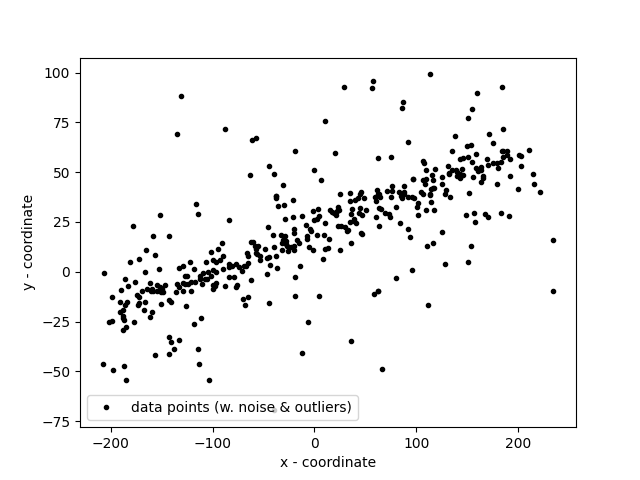

In [ ]:

np.random.seed(seed=1)

# parameters for "true" line y = a*x + b
a, b = 0.2, 20.0

# x-range of points [x1,x2]
x_start, x_end = -200.0, 200.0

# generate "idealized" line points
x = np.arange(x_start,x_end)
y = a * x + b               
data = np.column_stack([x, y])    # staking data points into (Nx2) array

# add gaussian pertubations to generate "realistic" data points (noisy line observations)
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'sample')
data += 5 * noise
data[::2] += 10 * noise[::2]  # every second point adds noise with variance 5
data[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

# IMPORTANT COMMENT!!!!!!!: 
# the data now combines line points with different levels of additive Gaussian noise.
# Consider all these noisy points as inliers.
# Do not consider any of these as outliers. The outliers are added in Problem 4.

plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.show()


## Least-squares and line fitting in 2D (synthetic data without outliers)

True


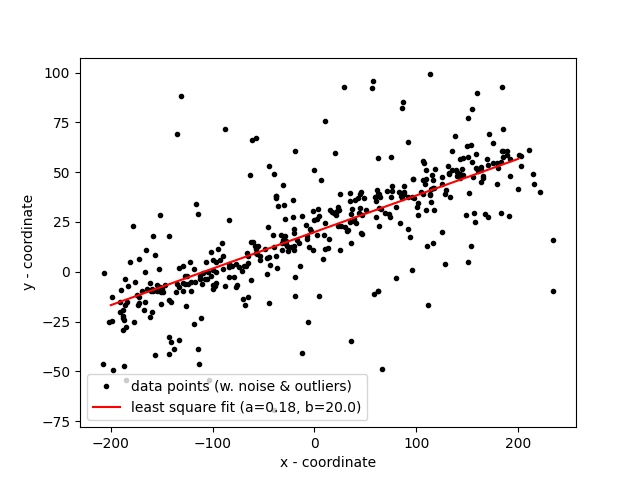

In [ ]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print (LSline.estimate(data))
a_ls, b_ls = LSline.line_par()

# visualizing estimated line
ends = np.array([x_start,x_end])
plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
plt.legend(loc='lower left')
plt.show()


## RANSAC for robust line fitting in 2D (synthetic data with outliers)

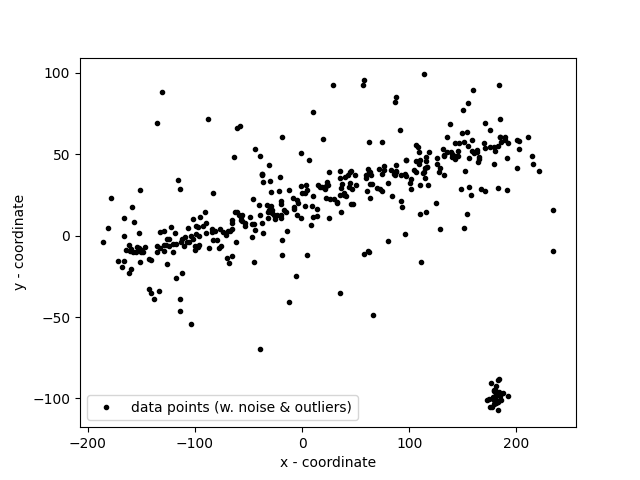

In [ ]:
# add outliers
faulty = np.array(30 * [(180., -100)])  # (30x2) array containing 30 rows [180,-100]  (points)
faulty += 5 * np.random.normal(size=faulty.shape)  # adding Gaussian noise to these points
data[:faulty.shape[0]] = faulty   # replacing the first 30 points in data with faulty (outliers)

plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.show()

The code below uses the class $LeastSquareLine$ from above for least-square line fitting when the data is corrupted with outliers. 

True


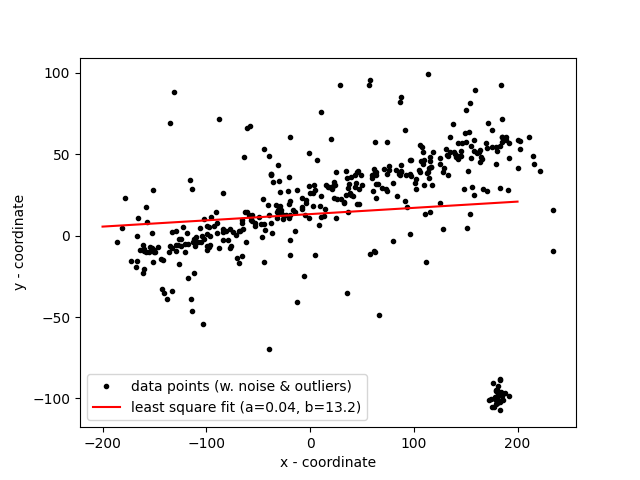

In [ ]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print (LSline.estimate(data))
a_ls, b_ls = LSline.line_par()

# visualizing estimated line
ends = np.array([x_start,x_end])
plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
plt.legend(loc='lower left')
plt.show()

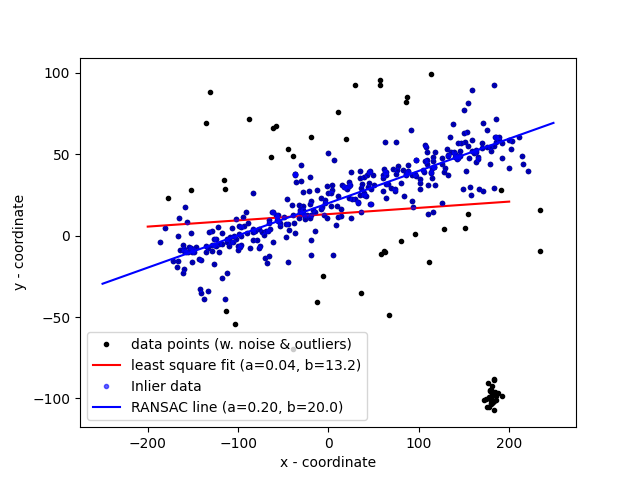

In [ ]:
# robustly fit line using RANSAC algorithm
model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=35, max_trials=2)
a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
plt.legend(loc='lower left')
plt.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
plt.plot(line_x, line_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
plt.legend(loc='lower left')
plt.show()

## Sequential RANSAC for robust multi-line fitting (synthetic data)
 Adding data points supporting one more line

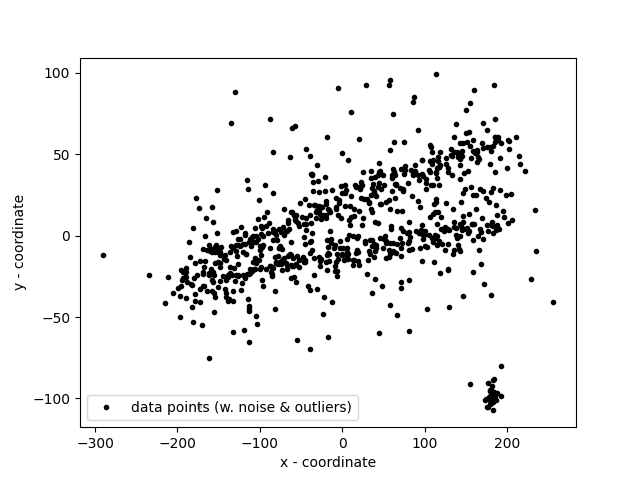

In [ ]:
# parameters for "true" lines y = a*x + b
a2, b2 = 0.1, -10.0

# generate "idealized" line points
y2 = a2 * x + b2
data2 = np.column_stack([x, y2])    # staking data points into (Nx2) array

# add gaussian pertubations to generate "realistic" line data
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data2+= 5 * noise
data2[::2] += 10 * noise[::2]  # every second point adds noise with variance 5
data2[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

data = np.concatenate((data,data2)) # combining with previous data

plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.show()

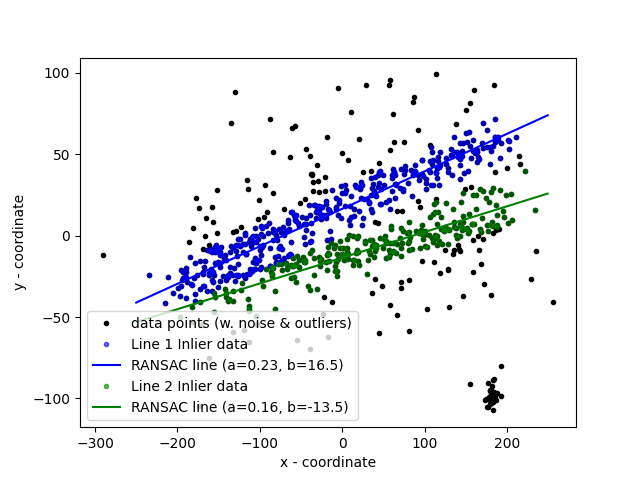

In [ ]:
# robustly fit line 1 using RANSAC algorithm
model1_robust, inliers1 = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=15, max_trials=20)
a1_rs, b1_rs = model1_robust.line_par()

# generate coordinates of estimated models for line 1
line1_x = np.arange(-250, 250)
line1_y_robust = model1_robust.predict_y(line1_x)

# remove points that are part of the first line
data_2 = data[~inliers1]

# robustly fit line 2 using RANSAC algorithm and remaining points
model2_robust, inliers2 = ransac(data_2, LeastSquareLine, min_samples=2, residual_threshold=15, max_trials=20)
a2_rs, b2_rs = model2_robust.line_par()

# generate coordinates of estimated models
line2_x = np.arange(-250, 250)
line2_y_robust = model2_robust.predict_y(line2_x)

plt.figure()
plt.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend(loc='lower left')
plt.plot(data[inliers1, 0], data[inliers1, 1], '.b', alpha=0.6, label='Line 1 Inlier data')
plt.plot(line1_x, line1_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a1_rs,b1_rs))
plt.plot(data_2[inliers2, 0], data_2[inliers2, 1], '.g', alpha=0.6, label='Line 2 Inlier data')
plt.plot(line2_x, line2_y_robust, '-g', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a2_rs,b2_rs))
plt.legend(loc='lower left')

## Multi-line fitting for real data (Canny edges)

C:\Users\dingj\AppData\Local\Temp\ipykernel_30076\1591631672.py:10: UserWarning: Ignoring specified arguments in this call because figure with num: 5 already exists
  plt.figure(5,figsize = (10, 4))


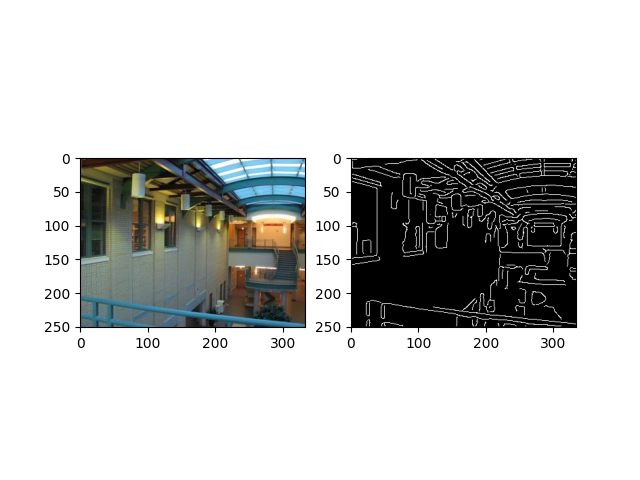

In [ ]:
import matplotlib.image as image
from skimage import feature
from skimage.color import rgb2gray

im = image.imread("images/CMU_left.jpg")
imgray = rgb2gray(im)
can = feature.canny(imgray, 2.0)

plt.clf()
plt.figure(5,figsize = (10, 4))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(can,cmap="gray")
plt.show()

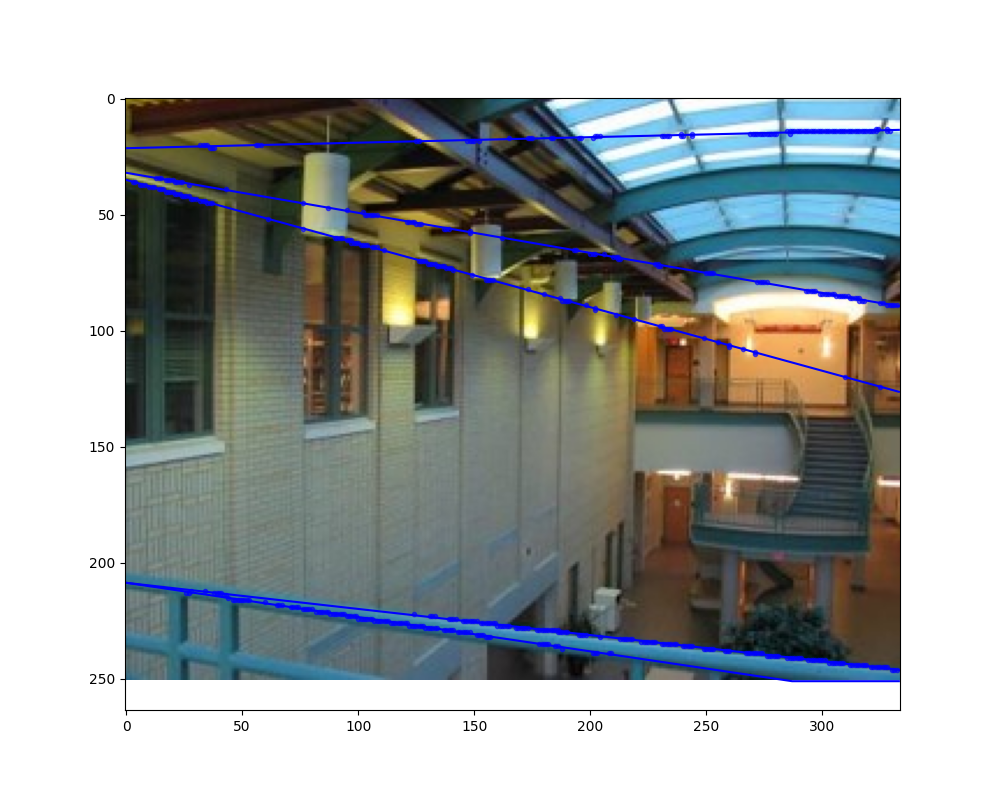

In [ ]:
K = 5 

def seq_ransac(image, can, min_inliers, threshold, max_trials, k):
    
    # consider only edge bits (can[x,y] = True) in the canny edges filtered image 
    # store as an array of pixel coordinates
    sample = np.column_stack(np.nonzero(can))[:, ::-1]
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap="gray")
    
    m, n, _ = im.shape
    
    # find k lines
    for i in range(k): 
        while True:
            # robustly fit lines using RANSAC algorithm
            model_robust, inliers = ransac(sample, LeastSquareLine, min_samples=2, residual_threshold=threshold, max_trials=max_trials)
            
            # stop searching when # of inliers > min requirement
            if inliers.size > min_inliers:
                break
            
        a_rs, b_rs = model_robust.line_par()
        # generate coordinates of estimated models
        line_x = np.arange(0, n)
        line_y_robust =  np.clip(model_robust.predict_y(line_x), 0, m)

        plt.plot(np.clip(sample[inliers, 0], 0, n), np.clip(sample[inliers, 1], 0, m), '.b', alpha=0.6, label=f'Line {i} Inlier data')
        plt.plot(line_x, line_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
            
        # remove points that are part of the line
        sample = sample[~inliers]

    plt.show()

seq_ransac(im, can, 6000, 0.6, 1000, K)
